# Линейная классификация

Рассмотрим в работе способы построения линейной модели классификации.

Линейный классификатор представляет собой линейную модель, разделяющую два класса (-1, 1). Линейная модель описывается следующей формулой $\langle \omega, x \rangle + b = y$. Вектор весов $\omega$ - вектор нормали этой линейно модели. При $y = 0$, все точки $x$ принадлежат этой разделяющей прямой, при $y > 0$ объеты $x$ лежат с той стороны прямой линии, куда смотрит вектор весов $\omega$, при $y < 0$ с другой стороны прямой линии. Таким образом линейная модель разделяет все объекты на положительный и отрицательные, причем чем дальше объект лежит от прямой, тем большее абсолютное значение он имеет.

Необходимо ввести обозначение отступа:

$$M = y \langle \omega, x \rangle$$

Таким образом, если объект будет лежать со стороны своего класса (классифицироваться правильно), то $M$ всегда будет иметь положительное значение. В случае неправилной классификации отступ будет отрицательным.

Введем несколько loss-функцию, которые будет оптимизировать:

1. логистическая: $$\bar L(M) = \ln(1+ \exp(-M))$$

2. экспоненциальны: $$\bar L(M) = \exp(-M)$$

3. кусочно-линейная: $$\bar L(M) = max(0, 1-M))$$

Таким образом для каждого объекта будет вычислена его собственный штраф. Чтобы получить полную функцию потеря - просто проссумируем штрафы всех объектов.
Таким образом у нас будет функция, подсчитывающая штрафы для конкретной модели. Необходимо ее оптимизировать, для этого надо вычислить градиент и начать движение (изменение весов модели $\omega$) в сторону антиградиента с некоторым постоянным шагом.

## Задача
1. Написать функцию расчета функции потерь (loss-функции) и градиента функции. (выбрать любую функцию)
2. Реализовать градиентный спуск по всем данным.
3. Реализовать стохастический градиентный спуск.

In [4]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import math

### Задача 1
Напишите две функции, которые будут получать на вход вектор весов, признаки и целевую переменную. Функции должны возвращать суммарную ошибку и градиент.

In [5]:
def loss(c_w0, c_w1, c_w2, x, y):
    Q = np.array
    Q = np.exp(-y*(c_w0 + c_w1*x[:,0] + c_w2*x[:,1]))
    sumLoss = 0
    for i in Q:
        sumLoss = sumLoss + i
    return sumLoss

def grad_loss(c_w0, c_w1, c_w2, x, y):
    ww0 = 0
    ww1 = 0
    ww2 = 0
    #log
    
    #ww0=sum(1/(1+np.exp(-1*y*(c_w1*x[:,0]+c_w2*x[:,1]+c_w0)))*np.exp(-1*y*(c_w1*x[:,0]+c_w2*x[:,1]+c_w0))*(-1)*y)
    #ww1=sum(1/(1+np.exp(-1*y*(c_w1*x[:,0]+c_w2*x[:,1]+c_w0)))*np.exp(-1*y*(c_w1*x[:,0]+c_w2*x[:,1]+c_w0))*(-1)*y*x[:,0])
    #ww2=sum(1/(1+np.exp(-1*y*(c_w1*x[:,0]+c_w2*x[:,1]+c_w0)))*np.exp(-1*y*(c_w1*x[:,0]+c_w2*x[:,1]+c_w0))*(-1)*y*x[:,1])
    
    #exp
    
    ww2 = sum(-y*x[:,1]*np.exp(-y*(c_w0 + c_w1*x[:,0] + c_w2*x[:,1])))
    ww1 = sum(-y*x[:,0]*np.exp(-y*(c_w0 + c_w1*x[:,0] + c_w2*x[:,1])))
    ww0 = sum(-y*np.exp(-y*(c_w0 + c_w1*x[:,0] + c_w2*x[:,1])))
    return (ww0, ww1, ww2)

Дан набор данных.
Проведена нормализация данных по признакам и выставлены классы (-1, 1).

Проведите случайную линейную модель, постройте ее на графике и вычислите для нее суммарную функцию ошибки.
Проверьте, что суммарная функция ошибки считается правильно.

118.86481229336225
(20.395998930099772, 37.25737540348567, 74.96527042441579)


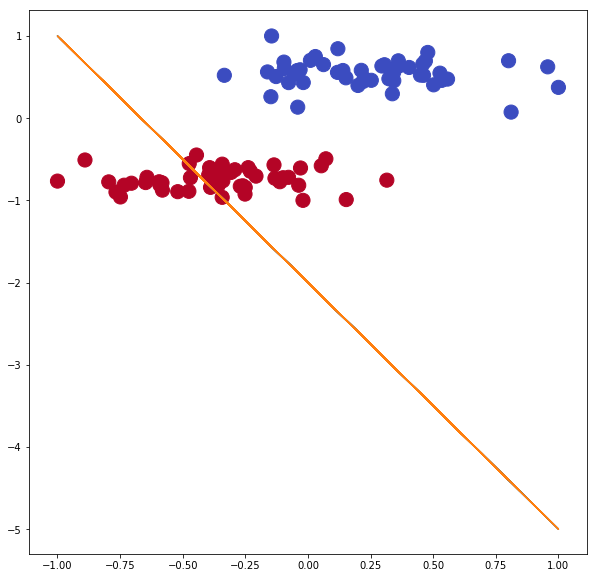

In [6]:
X, Y = make_blobs(n_samples=100, n_features=2, centers=2 ,cluster_std=1, random_state=17, center_box=(-10, 10))
cmap = plt.cm.coolwarm
plt.figure(figsize=(10,10))
X[:,0] = 2 * (X[:,0] - X[:,0].min()) / (X[:,0].max() - X[:,0].min()) - 1
X[:,1] = 2 * (X[:,1] - X[:,1].min()) / (X[:,1].max() - X[:,1].min()) -1 
plt.scatter(X[:,0], X[:,1], s = 200, c = Y, cmap=cmap)
Y[Y == 0] = -1
w0 = 0.2
w1 = 0.3
w2 = 0.1
plt.plot(X, (-w0-w1*X)/w2)
print(loss(w0, w1, w2, X, Y))
print(grad_loss(w0, w1, w2, X, Y))

### Задача 2. Реализация метода градиентного спуска
Постройте анимационную гифку схождения вашей линейной модели к данным. Подпишите loss к каждому кадру на гифке.

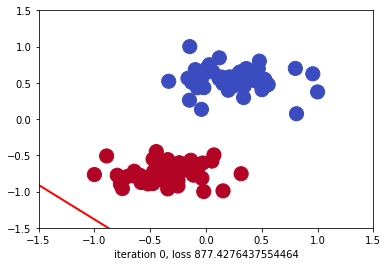

In [19]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib import animation, rc

fig, ax = plt.subplots()

w0 = 2
w1 = 1
w2 = 1

#exp
m = 1e-3# шаг обучения

#log
#m = 1e-3

# Данные
plt.scatter(X[:,0], X[:,1], s = 200, c = Y, cmap=cmap)

# Модель данных
line = lambda x1 : -(x1 * w1 + w0)
clf, = ax.plot([X[:,0].min() - .5, X[:,0].max() + .5], [line(X[:,0].min() - .5), line(X[:,0].max() + .5)], 'r-', linewidth=2)

# Настройка графика
ax.set_xlim([X[:,0].min() - .5, X[:,0].max() + .5])
ax.set_ylim([X[:,1].min() - .5, X[:,1].max() + .5])


def update(i):
    global w, X, Y, m, w0, w1, w2
    label = 'iteration {0}, loss {1}'.format(i, loss(w0, w1, w2, X, Y))
    # Градиент в примере задан постоянными величинами
    # На деле после каждой итерации необходимо пересчитывать градиент и изменять веса модели.
    div_w0 = grad_loss(w0, w1, w2, X, Y)[0]
    div_w1 = grad_loss(w0, w1, w2, X, Y)[1]
    div_w2 = grad_loss(w0, w1, w2, X, Y)[2]
    w0 -= m * div_w0   
    w1 -= m * div_w1
    w2 -= m * div_w2
    line = lambda c_x : (-w0-w1*c_x)/w2
    clf.set_ydata([line(X[:,0].min()), line(X[:,1].max())])
    ax.set_xlabel(label)
    return line, ax

anim = FuncAnimation(fig, update, frames=np.arange(0, 100))
rc('animation', html='html5')

In [65]:
print(w0)
print(w1)
print(w2)
type(X[:, 1])

0.7426582965106053
0.6603352740689569
0.4592537939064623


numpy.ndarray

In [21]:
anim

### Задача 3. Реализация стохастического градиентного спуска.
Используйте на каждой итерации не весь набор данных, а $n$ случайных объектов из выборки. Оформите результат схождения вашей модели в виде гифки.

In [81]:
import random

In [82]:

def loss_s(c_w0, c_w1, c_w2, x, y, n):
    Q = np.array
    Q = np.exp(-y*(c_w0 + c_w1*x[:,0] + c_w2*x[:,1]))
    sumLoss = 0
    for i in range(n):
        sumLoss = sumLoss + Q[i]
    return sumLoss
def grad_loss_s(c_w0, c_w1, c_w2, x, y, n):
    ww0 = 0
    ww1 = 0
    ww2 = 0
    ww2 = sum(-y[0:n]*x[0:n,1]*np.exp(-y[0:n]*(c_w0 + c_w1*x[0:n,0] + c_w2*x[0:n,1])))
    ww1 = sum(-y[0:n]*x[0:n,0]*np.exp(-y[0:n]*(c_w0 + c_w1*x[0:n,0] + c_w2*x[0:n,1])))
    ww0 = sum(-y[0:n]*np.exp(-y[0:n]*(c_w0 + c_w1*x[0:n,0] + c_w2*x[0:n,1])))
    return (ww0, ww1, ww2)

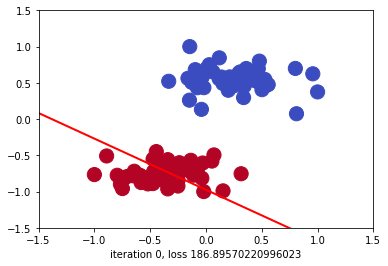

In [87]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib import animation, rc

fig, ax = plt.subplots()

w0 = 1
w1 = 1
w2 = 1

#exp
m = 1e-3# шаг обучения

# Данные
plt.scatter(X[:,0], X[:,1], s = 200, c = Y, cmap=cmap)

# Модель данных
line = lambda x1 : -(x1 * w1 + w0)
clf, = ax.plot([X[:,0].min() - .5, X[:,0].max() + .5], [line(X[:,0].min() - .5), line(X[:,0].max() + .5)], 'r-', linewidth=2)

# Настройка графика
ax.set_xlim([X[:,0].min() - .5, X[:,0].max() + .5])
ax.set_ylim([X[:,1].min() - .5, X[:,1].max() + .5])


def update(i):
    global w, X, Y, m, w0, w1, w2
    n = random.randint(1, len(Y)-1)
    label = 'iteration {0}, loss {1}'.format(i, loss_s(w0, w1, w2, X, Y, n))
    div_w0 = grad_loss_s(w0, w1, w2, X, Y, n)[0]
    div_w1 = grad_loss_s(w0, w1, w2, X, Y, n)[1]
    div_w2 = grad_loss_s(w0, w1, w2, X, Y, n)[2]
    w0 -= m * div_w0   
    w1 -= m * div_w1
    w2 -= m * div_w2
    line = lambda c_x : (-w0-w1*c_x)/w2
    clf.set_ydata([line(X[:,0].min()), line(X[:,1].max())])
    ax.set_xlabel(label)
    return line, ax

anim = FuncAnimation(fig, update, frames=np.arange(0, 100))
rc('animation', html='html5')

In [88]:
anim